In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
data = pd.read_excel('cars_train.xlsx')
data

symboling  normalized.losses        make fuel.type aspiration  \
0            1              129.0       mazda       gas        std   
1            1              125.0  mitsubishi       gas        std   
2            3              150.0       mazda       gas        std   
3            3              194.0      nissan       gas        std   
4            0               85.0       honda       gas        std   
..         ...                ...         ...       ...        ...   
157          0                NaN      peugot       gas        std   
158          3              145.0       dodge       gas      turbo   
159          3              194.0      nissan       gas        std   
160          0               85.0       honda       gas        std   
161          2               83.0      subaru       gas        std   

    num.of.doors  wheel.base  length  width  height  ...  engine.size  \
0            two        98.8   177.8   66.5    53.7  ...          122   
1           four        96.3   172.4   65.4    51.6  ...          122   
2            two        95.3   169.0   65.7    49.6  ...           70   
3            NaN        91.3   170.7   67.9    49.7  ...          181   
4           four        96.5   175.4   65.2    54.1  ...          110   
..           ...         ...     ...    ...     ...  ...          ...   
157         four       114.2   198.9   68.4    56.7  ...          120   
158          two        95.9   173.2   66.3    50.2  ...          156   
159          NaN        91.3   170.7   67.9    49.7  ...          181   
160         four        96.5   175.4   65.2    54.1  ...          110   
161          two        93.3   157.3   63.8    55.7  ...          108   

    fuel.system  bore stroke  compression.ratio  horsepower  peak.rpm  \
0          2bbl  3.39   3.39                8.6        84.0    4800.0   
1          2bbl  3.35   3.46                8.5        88.0    5000.0   
2          4bbl   NaN    NaN                9.4       101.0    6000.0   
3          mpfi  3.43   3.27                9.0       160.0    5200.0   
4          mpfi  3.15   3.58                9.0       101.0    5800.0   
..          ...   ...    ...                ...         ...       ...   
157        mpfi  3.46   2.19                8.4        95.0    5000.0   
158         mfi  3.60   3.90                7.0       145.0    5000.0   
159        mpfi  3.43   3.27                9.0       160.0    5200.0   
160        mpfi  3.15   3.58                9.0       101.0    5800.0   
161        2bbl  3.62   2.64                8.7        73.0    4400.0   

     city.mpg  highway.mpg  Car_Price  
0          26           32    10595.0  
1          25           32     8189.0  
2          17           23    13645.0  
3          19           25    17199.0  
4          24           28    12945.0  
..        ...          ...        ...  
157        19           24    16695.0  
158        19           24    12964.0  
159        19           25    17199.0  
160        24           28    12945.0  
161        26           31     7603.0  

[162 rows x 22 columns]

In [7]:
data.describe().T

count          mean          std      min       25%  \
symboling          162.0      0.907407     1.298855    -2.00     0.000   
normalized.losses  132.0    123.060606    36.144696    65.00    94.000   
wheel.base         162.0     98.354321     6.049384    86.60    94.500   
length             162.0    173.595062    12.339100   141.10   166.425   
width              162.0     65.843210     2.022325    60.30    64.125   
height             162.0     53.537654     2.346770    47.80    52.000   
curb.weight        162.0   2561.932099   524.474870  1488.00  2151.000   
engine.size        162.0    128.160494    41.684844    61.00    98.000   
bore               159.0      3.341698     0.274566     2.54     3.150   
stroke             159.0      3.239434     0.356446     2.07     3.075   
compression.ratio  162.0     10.008704     3.735804     7.00     8.700   
horsepower         158.0    106.000000    41.489773    48.00    72.250   
peak.rpm           158.0   5116.455696   501.952971  4150.00  4800.000   
city.mpg           162.0     25.123457     6.604878    13.00    19.000   
highway.mpg        162.0     30.679012     6.879309    16.00    25.000   
Car_Price          159.0  13182.094340  7746.121309  5118.00  7603.000   

                        50%        75%       max  
symboling              1.00      2.000      3.00  
normalized.losses    116.50    150.000    256.00  
wheel.base            96.50    101.200    120.90  
length               172.40    181.650    208.10  
width                 65.45     66.575     72.30  
height                53.70     55.500     59.10  
curb.weight         2419.50   2975.750   4066.00  
engine.size          120.00    146.000    326.00  
bore                   3.33      3.605      3.94  
stroke                 3.27      3.460      4.17  
compression.ratio      9.00      9.400     23.00  
horsepower            95.00    121.000    288.00  
peak.rpm            5100.00   5500.000   6600.00  
city.mpg              24.00     30.000     49.00  
highway.mpg           30.00     34.000     54.00  
Car_Price          10795.00  16594.000  41315.00

# EDA Analysis

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized.losses'}>,
        <Axes: title={'center': 'wheel.base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb.weight'}>,
        <Axes: title={'center': 'engine.size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression.ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak.rpm'}>,
        <Axes: title={'center': 'city.mpg'}>,
        <Axes: title={'center': 'highway.mpg'}>,
        <Axes: title={'center': 'Car_Price'}>]], dtype=object)

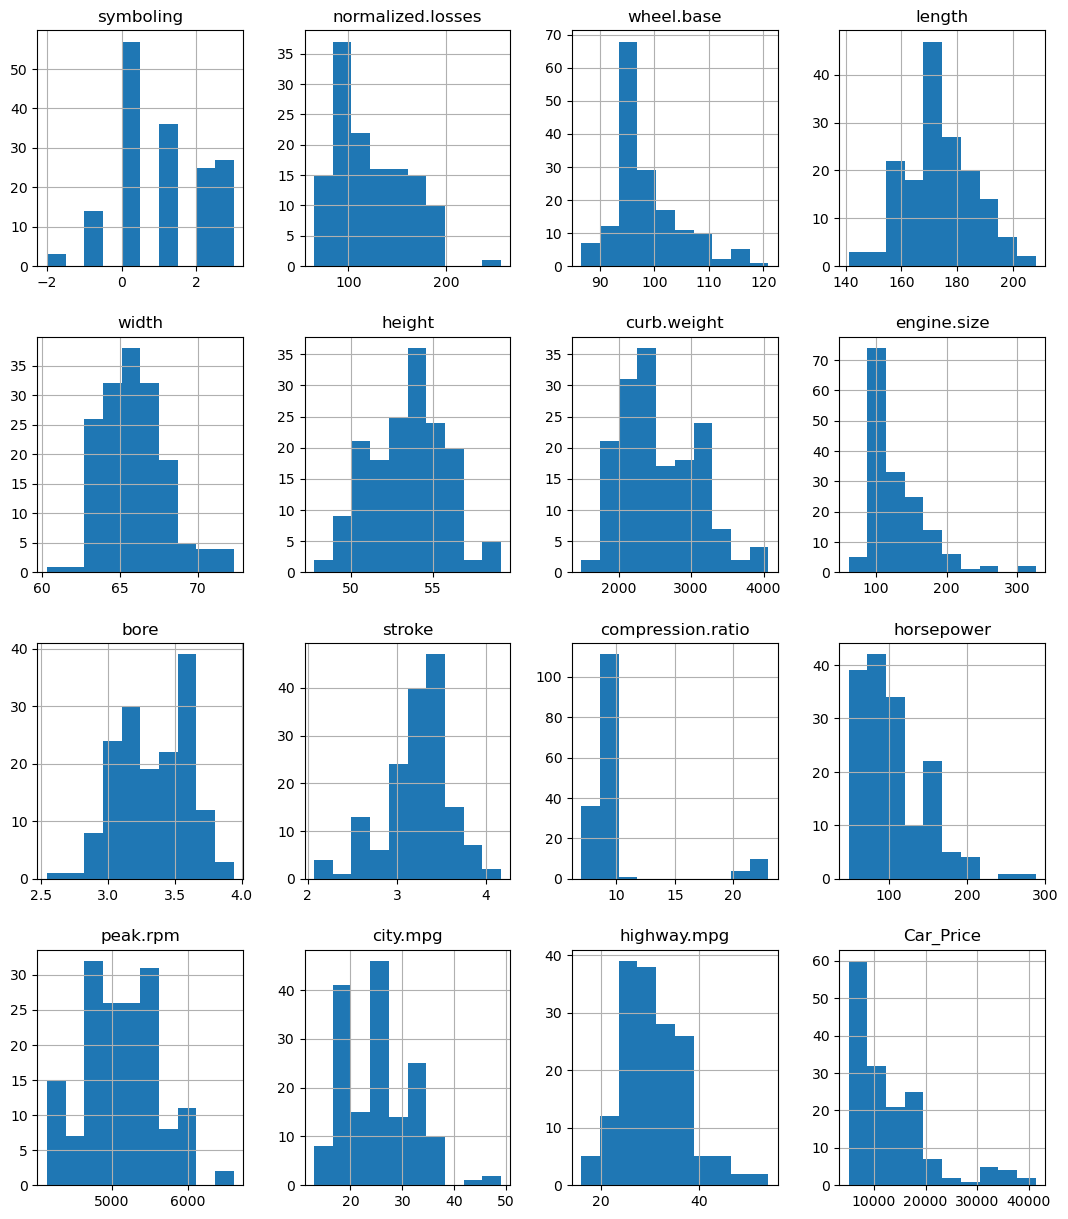

In [8]:
data.hist(figsize=(13,15))

<Axes: xlabel='Car_Price', ylabel='count'>

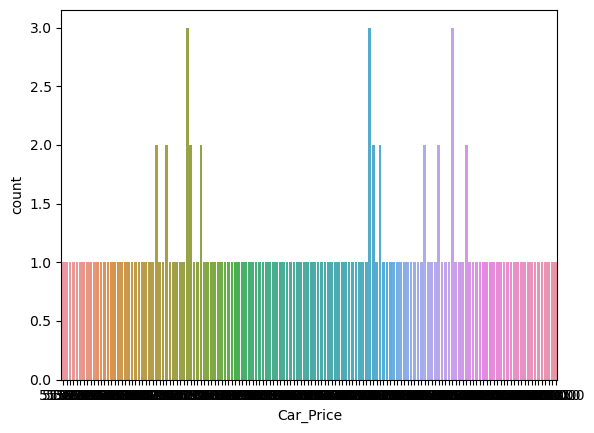

In [9]:
sns.countplot(data=data,x='Car_Price')

C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_41840\4088751238.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)


<function matplotlib.pyplot.show(close=None, block=None)>

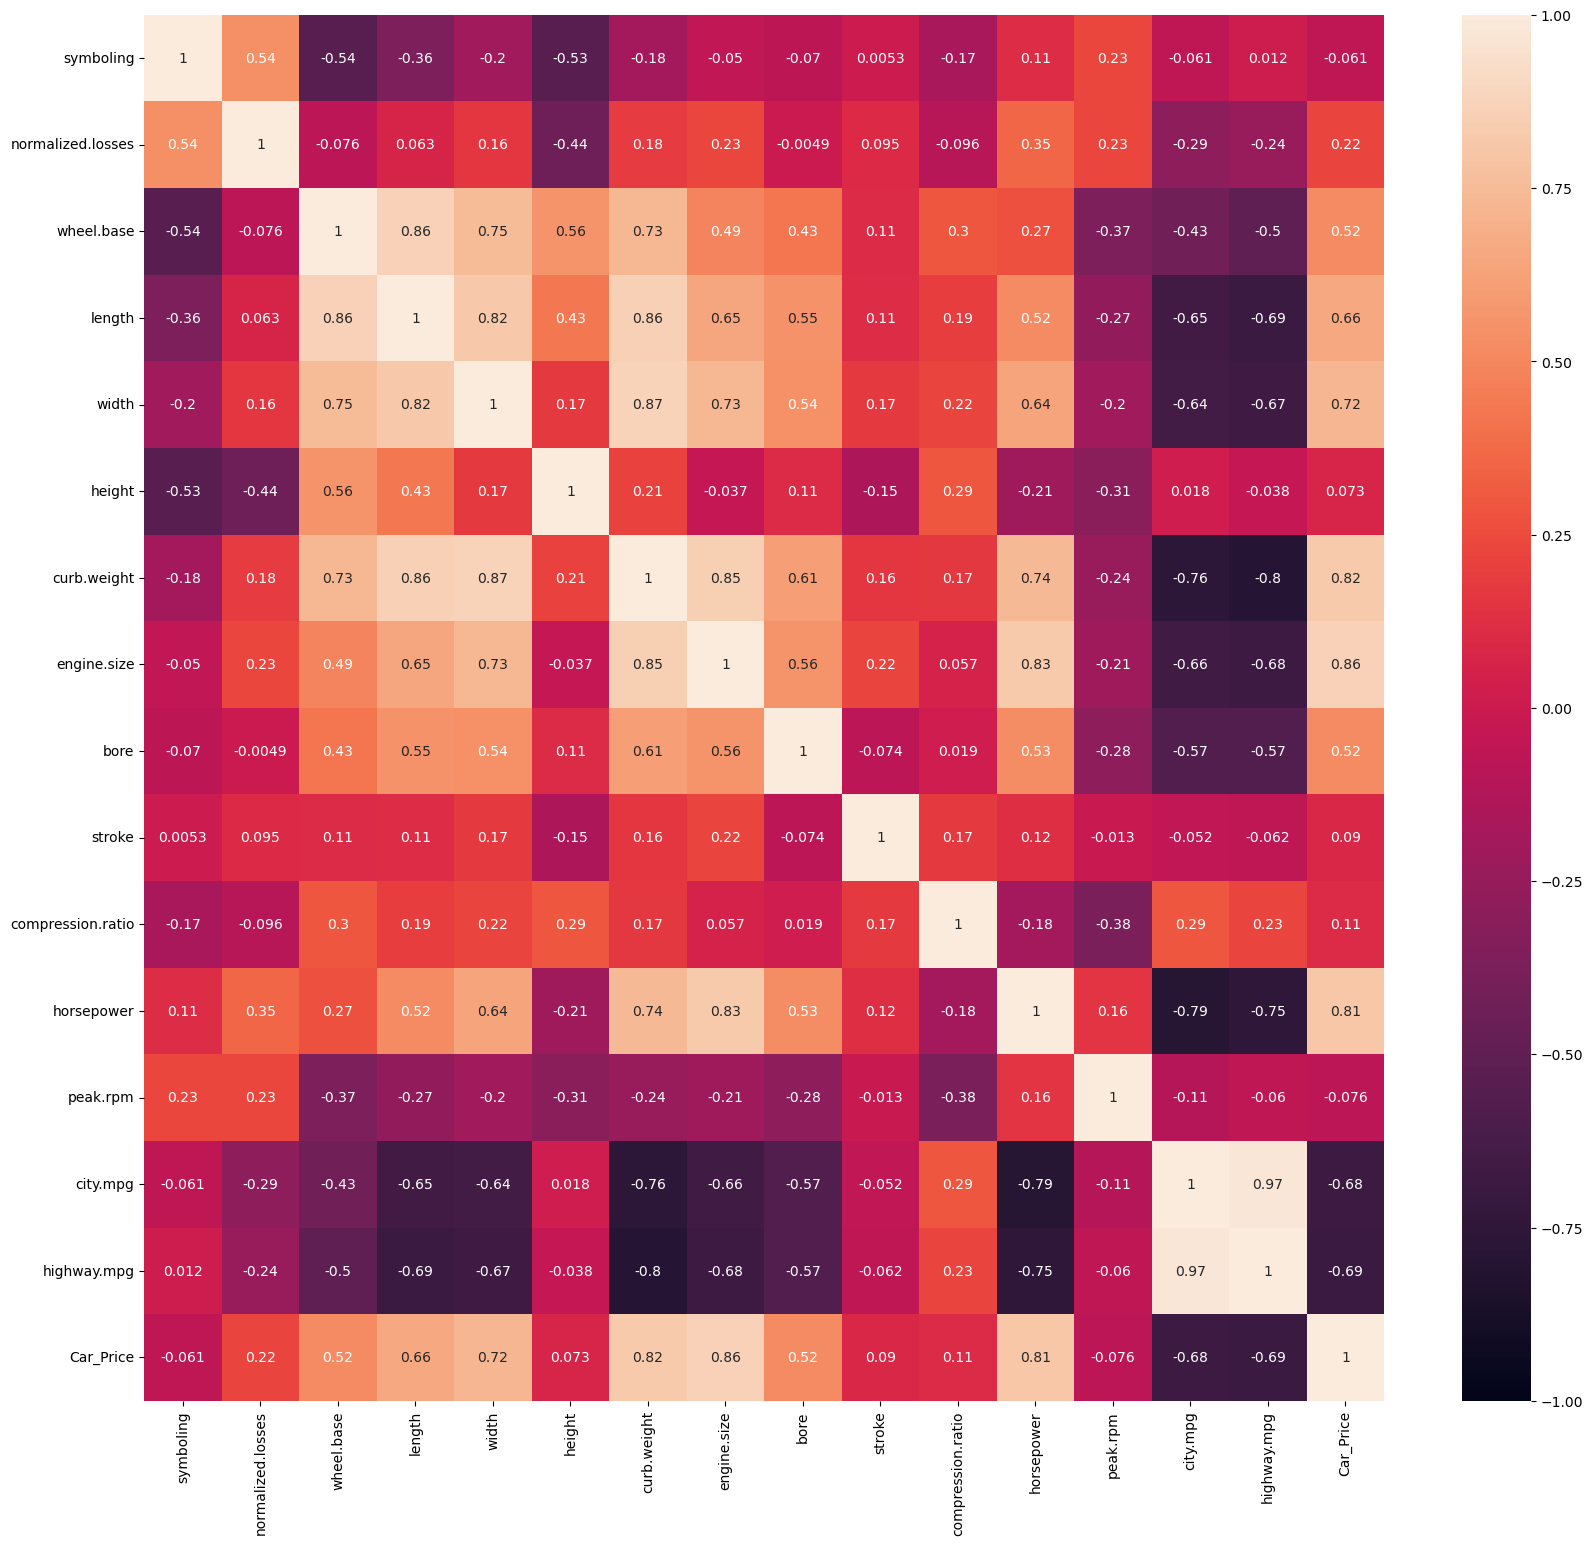

In [11]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show

<Axes: >

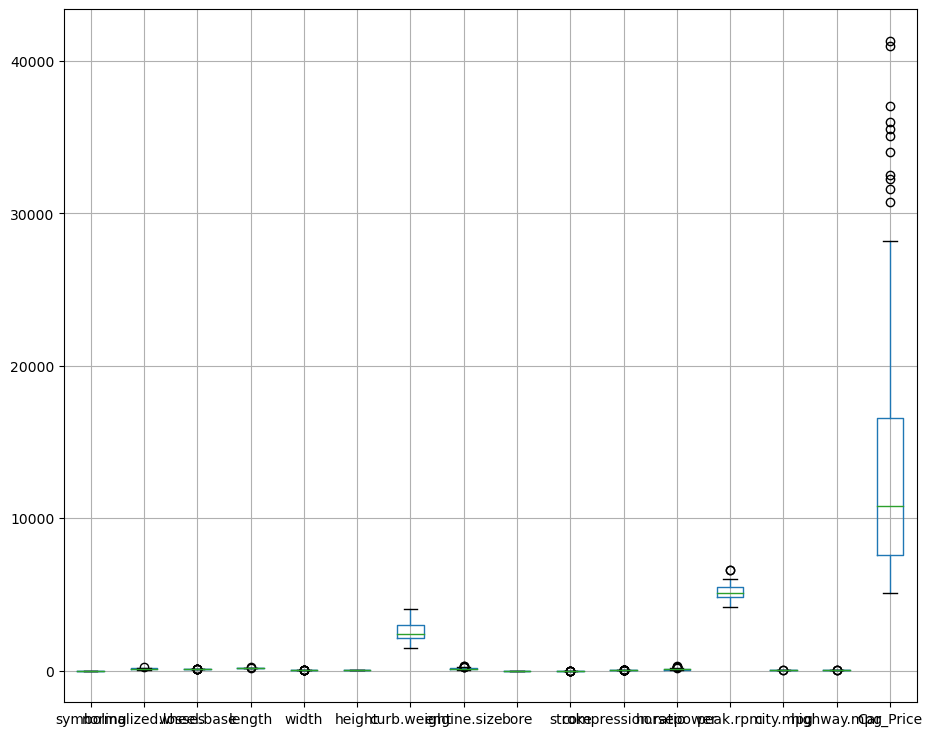

In [12]:
data.boxplot(figsize=(11,9))

<Axes: >

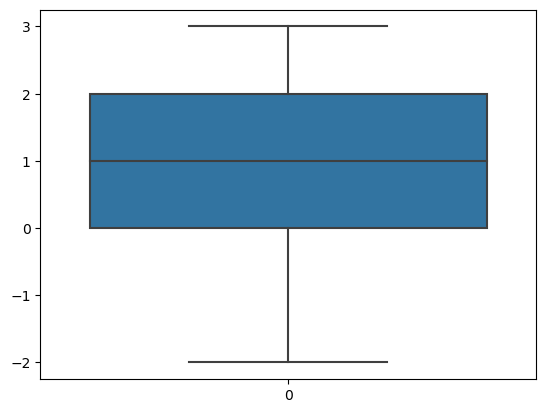

In [13]:
sns.boxplot(data['symboling'])

<Axes: >

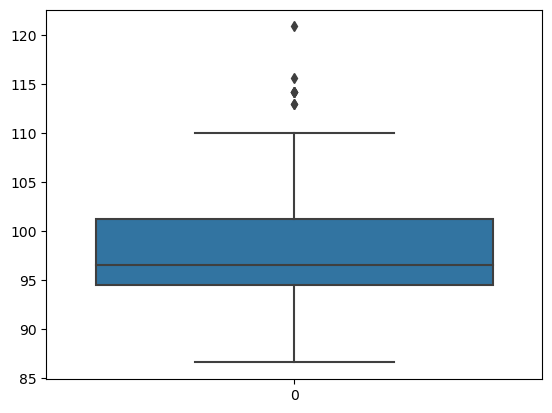

In [14]:
sns.boxplot(data['wheel.base'])

C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_41840\1475792507.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['length'])


<Axes: xlabel='length', ylabel='Density'>

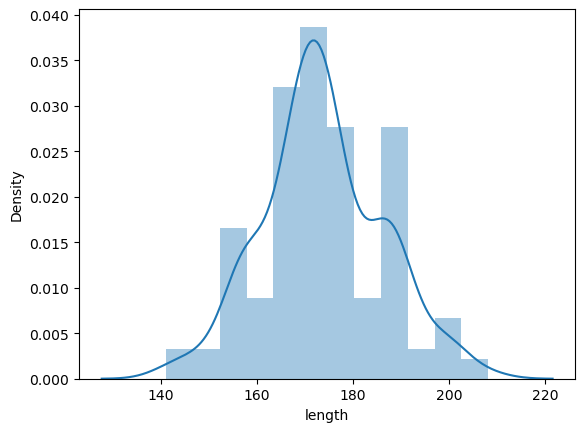

In [15]:
sns.distplot(data['length'])

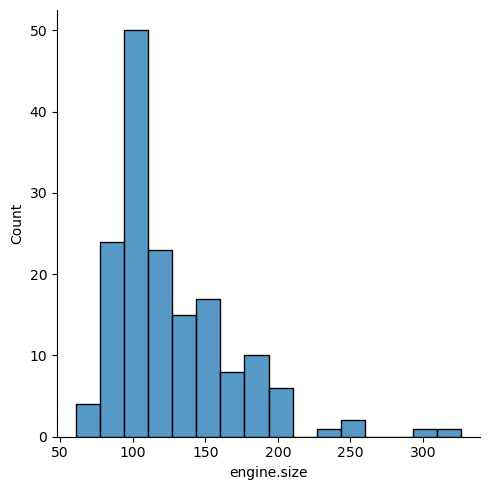

In [16]:
sns.displot(dat['engine.size'])

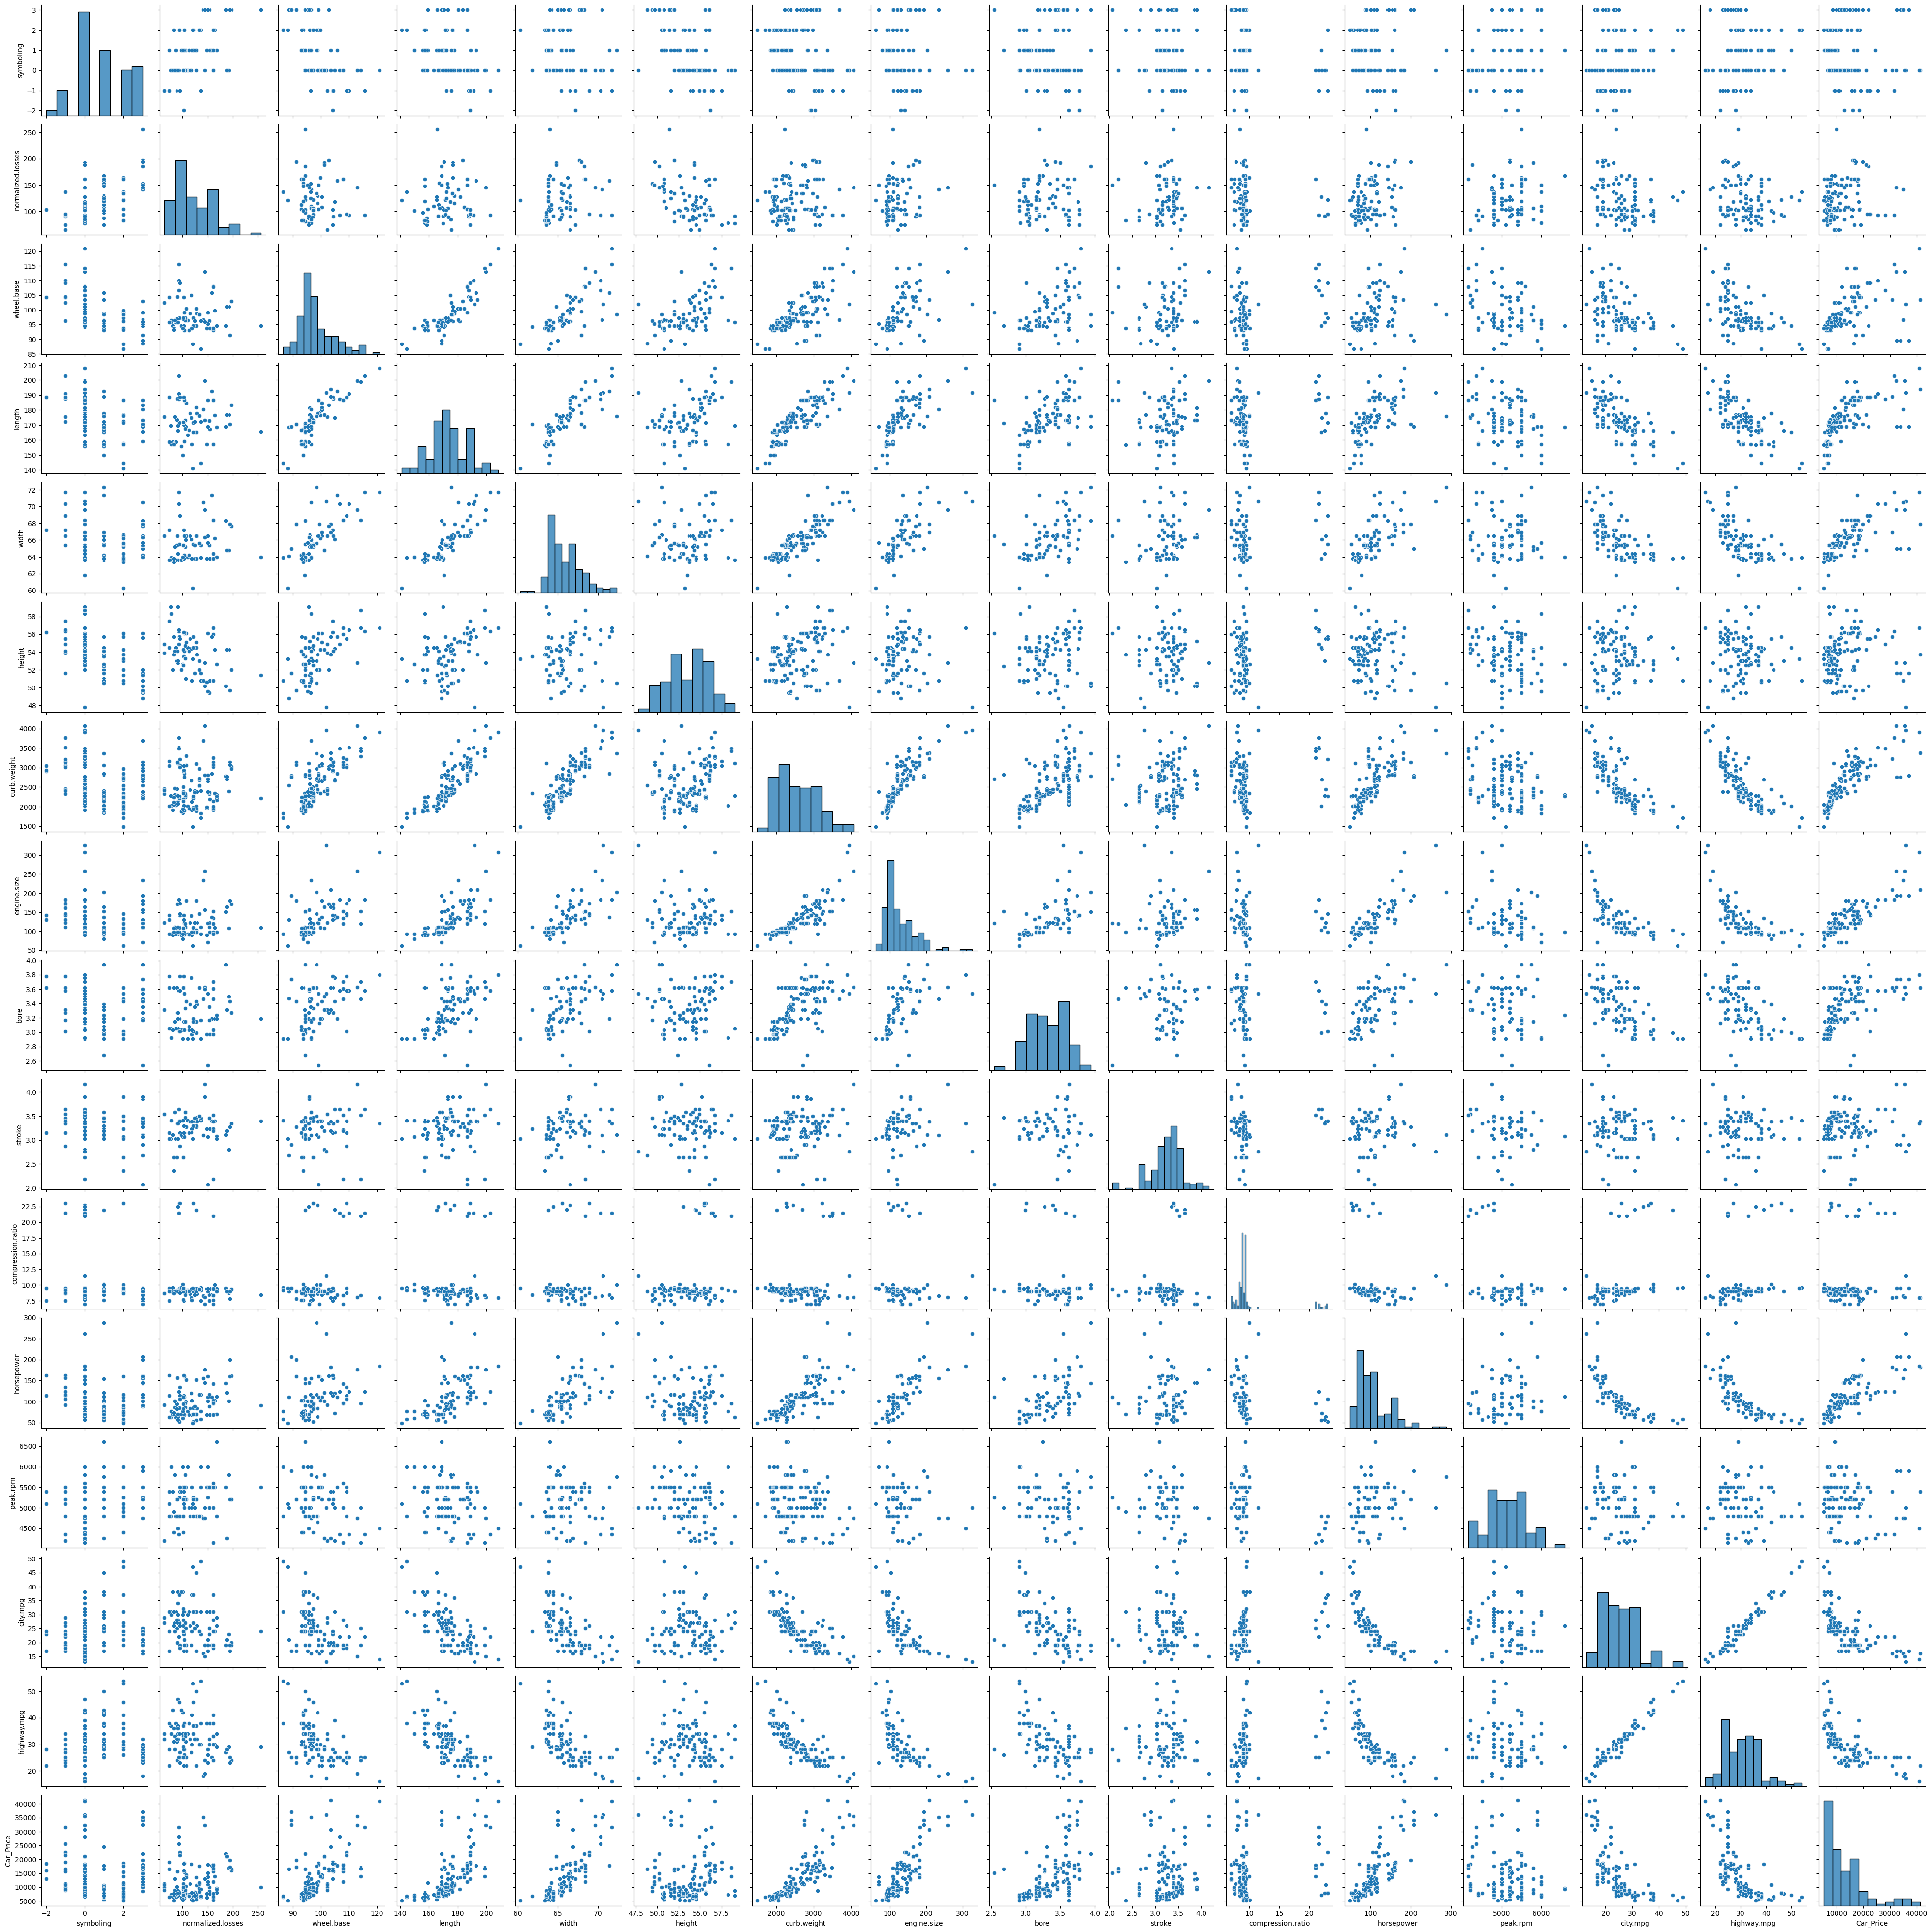

In [17]:
sns.pairplot(data)

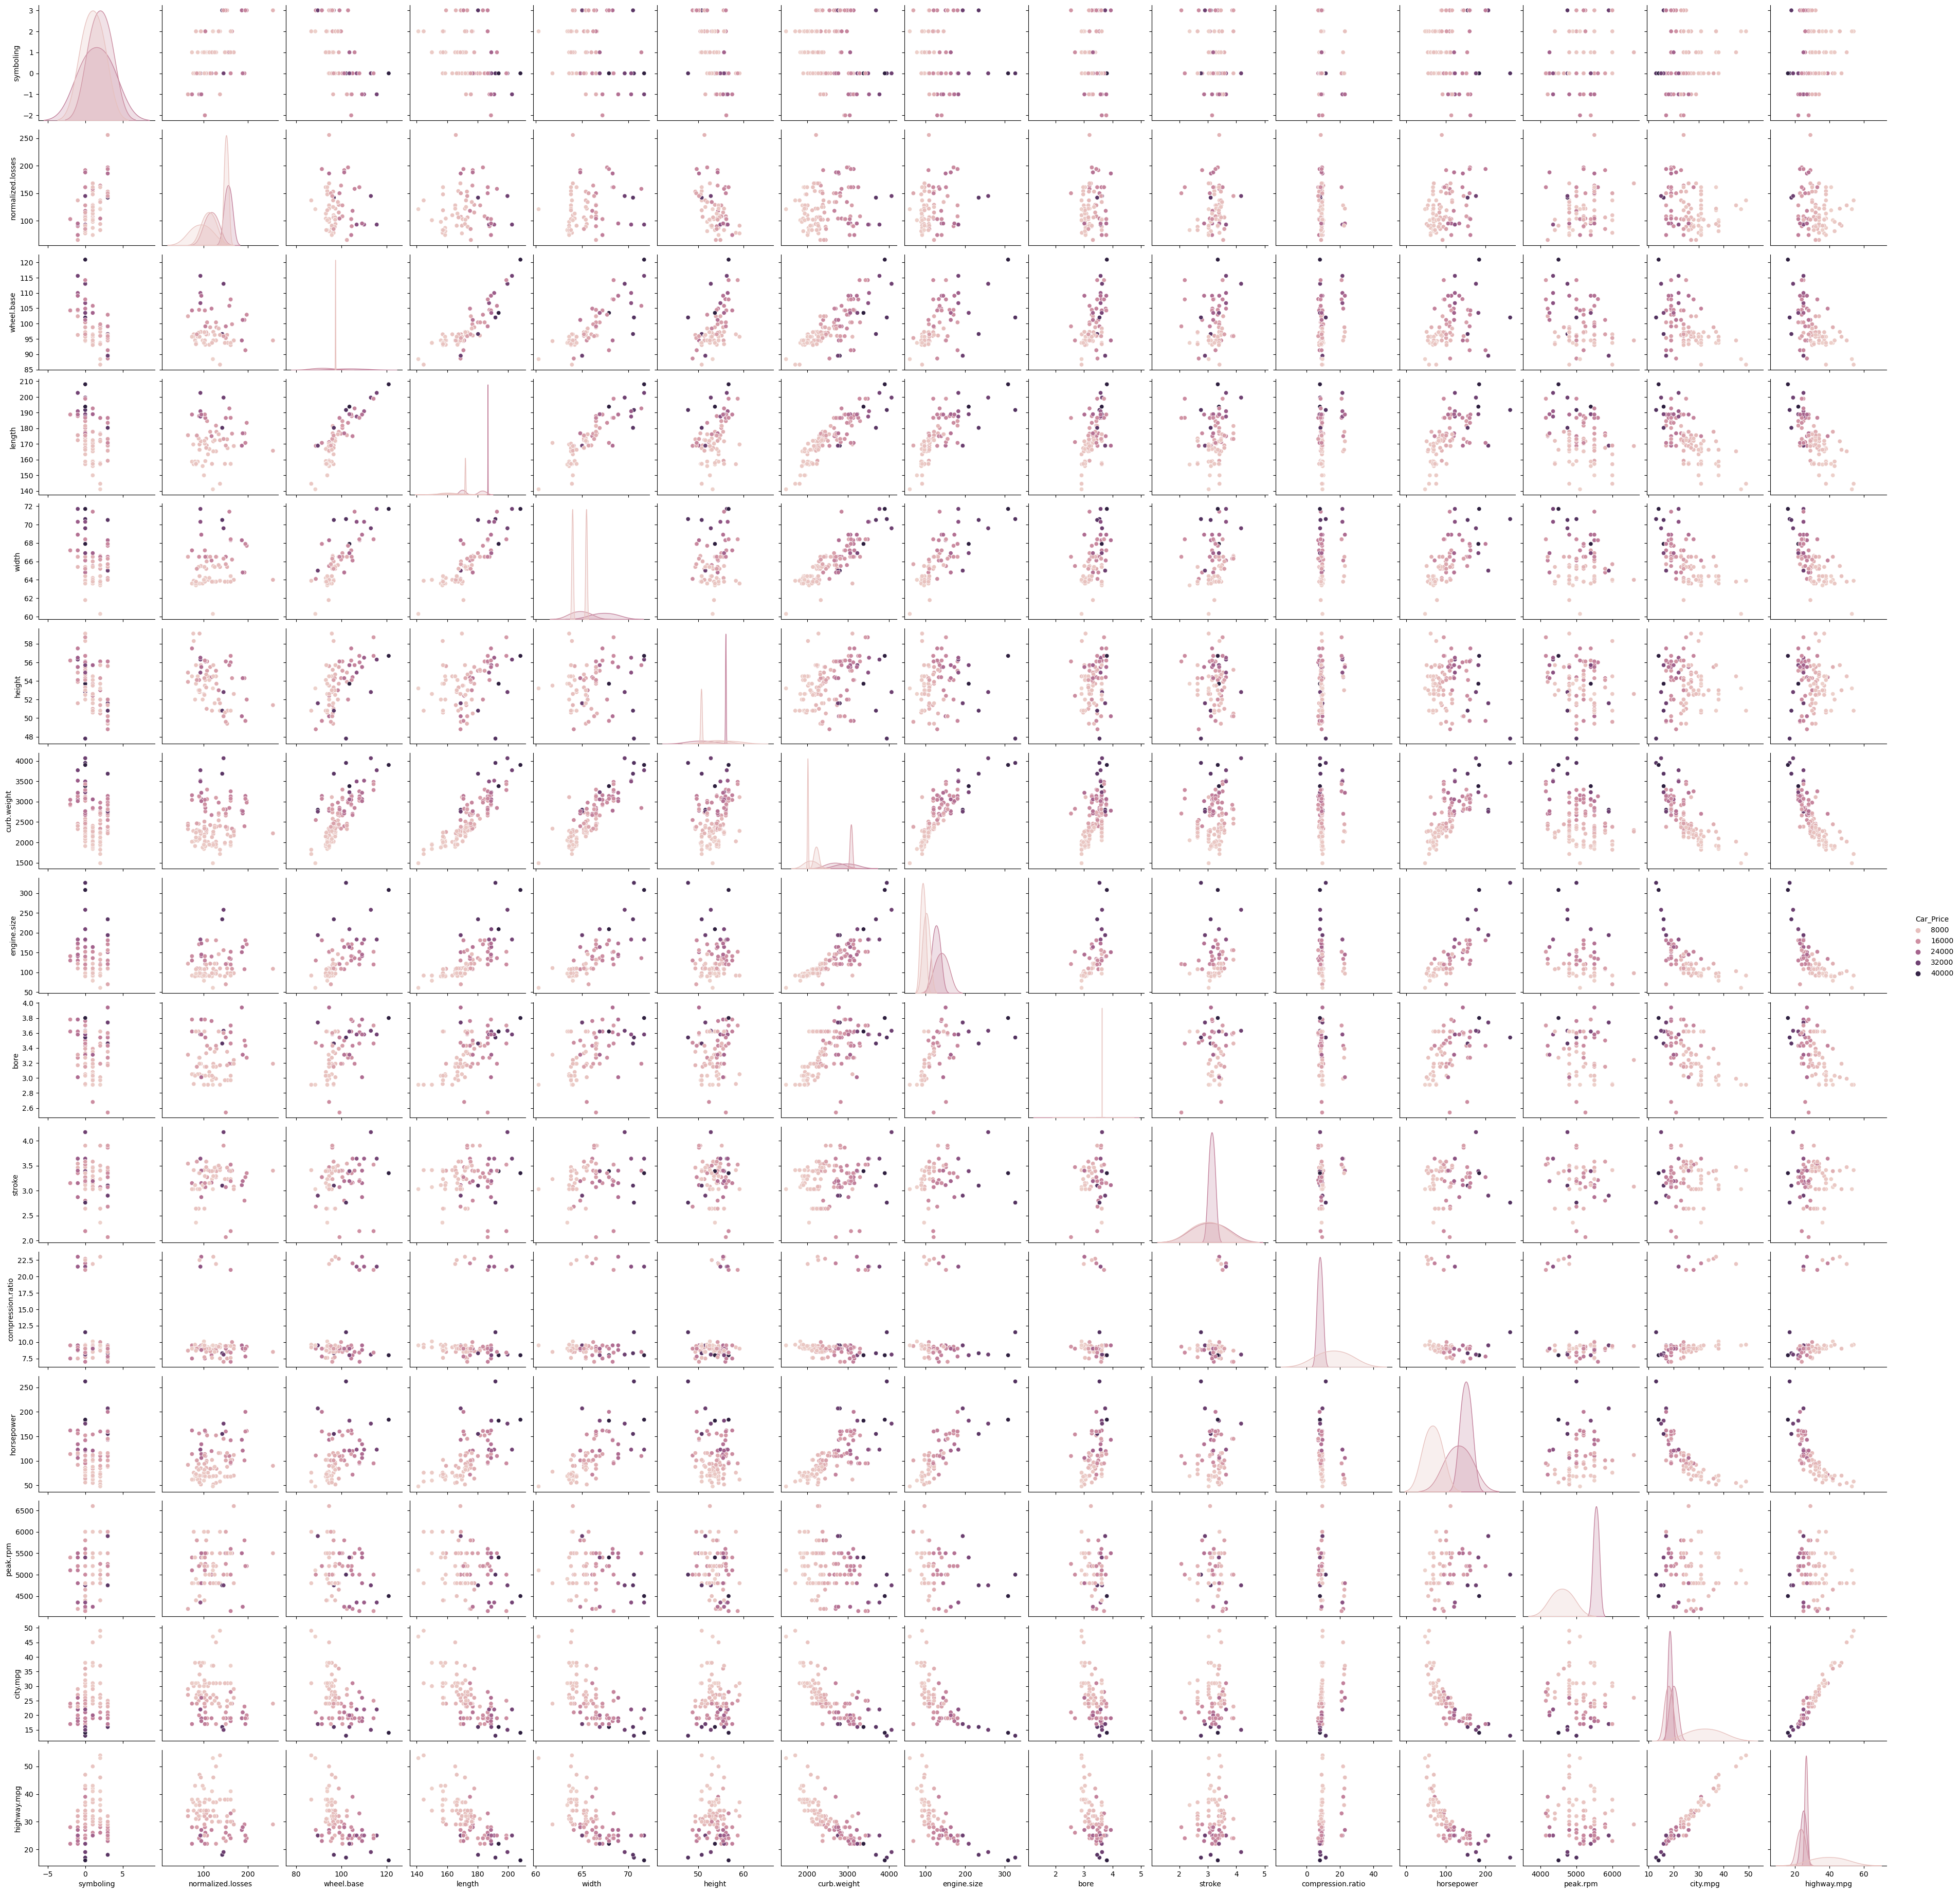

In [18]:
sns.pairplot(data,hue='Car_Price')

In [19]:
df=data
df.head()


symboling  normalized.losses        make fuel.type aspiration num.of.doors  \
0          1              129.0       mazda       gas        std          two   
1          1              125.0  mitsubishi       gas        std         four   
2          3              150.0       mazda       gas        std          two   
3          3              194.0      nissan       gas        std          NaN   
4          0               85.0       honda       gas        std         four   

   wheel.base  length  width  height  ...  engine.size fuel.system  bore  \
0        98.8   177.8   66.5    53.7  ...          122        2bbl  3.39   
1        96.3   172.4   65.4    51.6  ...          122        2bbl  3.35   
2        95.3   169.0   65.7    49.6  ...           70        4bbl   NaN   
3        91.3   170.7   67.9    49.7  ...          181        mpfi  3.43   
4        96.5   175.4   65.2    54.1  ...          110        mpfi  3.15   

  stroke  compression.ratio  horsepower  peak.rpm  city.mpg  highway.mpg  \
0   3.39                8.6        84.0    4800.0        26           32   
1   3.46                8.5        88.0    5000.0        25           32   
2    NaN                9.4       101.0    6000.0        17           23   
3   3.27                9.0       160.0    5200.0        19           25   
4   3.58                9.0       101.0    5800.0        24           28   

   Car_Price  
0    10595.0  
1     8189.0  
2    13645.0  
3    17199.0  
4    12945.0  

[5 rows x 22 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [20]:
min_val=df['symboling'].min()
min_val

-2

In [ ]:
df.shape

In [21]:
#to remove negative values
for i in range(162):
    df['symboling'][i]=df['symboling'][i]+2
    i=i+1

C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_41840\2616834314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['symboling'][i]=df['symboling'][i]+2


In [22]:
df['symboling'].min()

0

In [23]:
df.isna().sum()

symboling             0
normalized.losses    30
make                  0
fuel.type             0
aspiration            0
num.of.doors         11
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
engine.size           0
fuel.system           0
bore                  3
stroke                3
compression.ratio     0
horsepower            4
peak.rpm              4
city.mpg              0
highway.mpg           0
Car_Price             3
dtype: int64

In [24]:
df=df.fillna(method='bfill')


In [25]:
df.isna().sum()

symboling            0
normalized.losses    0
make                 0
fuel.type            0
aspiration           0
num.of.doors         0
wheel.base           0
length               0
width                0
height               0
curb.weight          0
engine.type          0
engine.size          0
fuel.system          0
bore                 0
stroke               0
compression.ratio    0
horsepower           0
peak.rpm             0
city.mpg             0
highway.mpg          0
Car_Price            0
dtype: int64

In [26]:
objcol=df.select_dtypes(include = 'object')

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
for i in objcol:
    df[i]=le.fit_transform(df[i])

In [29]:
df.head()

symboling  normalized.losses  make  fuel.type  aspiration  num.of.doors  \
0          3              129.0     8          1           0             1   
1          3              125.0    10          1           0             0   
2          5              150.0     8          1           0             1   
3          5              194.0    11          1           0             0   
4          2               85.0     5          1           0             0   

   wheel.base  length  width  height  ...  engine.size  fuel.system  bore  \
0        98.8   177.8   66.5    53.7  ...          122            1  3.39   
1        96.3   172.4   65.4    51.6  ...          122            1  3.35   
2        95.3   169.0   65.7    49.6  ...           70            2  3.43   
3        91.3   170.7   67.9    49.7  ...          181            5  3.43   
4        96.5   175.4   65.2    54.1  ...          110            5  3.15   

   stroke  compression.ratio  horsepower  peak.rpm  city.mpg  highway.mpg  \
0    3.39                8.6        84.0    4800.0        26           32   
1    3.46                8.5        88.0    5000.0        25           32   
2    3.27                9.4       101.0    6000.0        17           23   
3    3.27                9.0       160.0    5200.0        19           25   
4    3.58                9.0       101.0    5800.0        24           28   

   Car_Price  
0    10595.0  
1     8189.0  
2    13645.0  
3    17199.0  
4    12945.0  

[5 rows x 22 columns]

In [30]:
x=df.iloc[:,:-1]
x.head()

symboling  normalized.losses  make  fuel.type  aspiration  num.of.doors  \
0          3              129.0     8          1           0             1   
1          3              125.0    10          1           0             0   
2          5              150.0     8          1           0             1   
3          5              194.0    11          1           0             0   
4          2               85.0     5          1           0             0   

   wheel.base  length  width  height  ...  engine.type  engine.size  \
0        98.8   177.8   66.5    53.7  ...            3          122   
1        96.3   172.4   65.4    51.6  ...            3          122   
2        95.3   169.0   65.7    49.6  ...            6           70   
3        91.3   170.7   67.9    49.7  ...            5          181   
4        96.5   175.4   65.2    54.1  ...            3          110   

   fuel.system  bore  stroke  compression.ratio  horsepower  peak.rpm  \
0            1  3.39    3.39                8.6        84.0    4800.0   
1            1  3.35    3.46                8.5        88.0    5000.0   
2            2  3.43    3.27                9.4       101.0    6000.0   
3            5  3.43    3.27                9.0       160.0    5200.0   
4            5  3.15    3.58                9.0       101.0    5800.0   

   city.mpg  highway.mpg  
0        26           32  
1        25           32  
2        17           23  
3        19           25  
4        24           28  

[5 rows x 21 columns]

In [31]:
y=df.iloc[:,-1:]
y.head()

Car_Price
0    10595.0
1     8189.0
2    13645.0
3    17199.0
4    12945.0

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

print(xtrain.shape)
print()
print(ytrain.shape)
print()
print(xtest.shape)
print()
print(ytest.shape)

(129, 21)

(129, 1)

(33, 21)

(33, 1)


In [33]:
#linear
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(xtrain,ytrain)
ypred_lin_reg=lin_reg.predict(xtest)
#print('pridicted values\n',ypred_lin_reg)
print()
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print("MSE Linear reg: \t",MSE_lin_reg)
print()
print("RMSE Linear reg: \t",RMSE_lin_reg)
print()
print("R-Square Linear reg:\t",Accuracy_lin_reg)


MSE Linear reg: 	 18334946.98299371

RMSE Linear reg: 	 4281.932622425733

R-Square Linear reg:	 0.4327333454959936


In [34]:
#KNN REG
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(xtrain,ytrain)
ypred_knn_reg=knn_reg.predict(xtest)
#print('pridicted values\n',ypred_knn_reg)
print()
Accuracy_knn_reg=r2_score(ytest,ypred_knn_reg)
MSE_knn_reg=mean_squared_error(ytest,ypred_knn_reg)
RMSE_knn_reg=np.sqrt(mean_squared_error(ytest,ypred_knn_reg))
print("MSE KNN reg: \t",MSE_knn_reg)
print()
print("RMSE KNN reg: \t",RMSE_knn_reg)
print()
print("R-Square KNN reg:\t",Accuracy_knn_reg)


MSE KNN reg: 	 7574127.023569025

RMSE KNN reg: 	 2752.113192361285

R-Square KNN reg:	 0.7656633694423232


In [35]:
#decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=2,random_state=2)
dt_reg.fit(xtrain,ytrain)
ypred_dt_reg=dt_reg.predict(xtest)
#print('pridicted values\n',ypred_dt_reg)
print()

Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))

print("MSE Decision Tree reg: \t",MSE_dt_reg)
print()
print("RMSE Decision Tree reg: \t",RMSE_dt_reg)
print()
print("R-Square Decision Tree reg:\t",Accuracy_dt_reg)


MSE Decision Tree reg: 	 12729184.67693218

RMSE Decision Tree reg: 	 3567.7982954382637

R-Square Decision Tree reg:	 0.6061705543547764


In [36]:
#supportVector
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear')
svr_reg.fit(xtrain,ytrain)
ypred_svr_reg=svr_reg.predict(xtest)
#print('pridicted values\n',ypred_svr_reg)
print()

Accuracy_svr_reg=r2_score(ytest,ypred_svr_reg)
MSE_svr_reg=mean_squared_error(ytest,ypred_svr_reg)
RMSE_svr_reg=np.sqrt(mean_squared_error(ytest,ypred_svr_reg))

print("MSE SVR reg: \t",MSE_svr_reg)
print()
print("RMSE SVR Tree reg: \t",RMSE_svr_reg)
print()
print("R-Square SVR reg:\t",Accuracy_svr_reg)


MSE SVR reg: 	 10665941.606737513

RMSE SVR Tree reg: 	 3265.8753201458126

R-Square SVR reg:	 0.6700054263586877


C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#adaboot
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(base_estimator=dt_reg,n_estimators=16)
ada_reg.fit(xtrain,ytrain)
ypred_ada_reg=ada_reg.predict(xtest)
#print('pridicted values\n',ypred_ada_reg)
print()

Accuracy_ada_reg=r2_score(ytest,ypred_ada_reg)
MSE_ada_reg=mean_squared_error(ytest,ypred_ada_reg)
RMSE_ada_reg=np.sqrt(mean_squared_error(ytest,ypred_ada_reg))

print("MSE Ada reg: \t",MSE_ada_reg)
print()
print("RMSE Ada Tree reg: \t",RMSE_ada_reg)
print()
print("R-Square Ada reg:\t",Accuracy_ada_reg)


MSE Ada reg: 	 11943687.957855077

RMSE Ada Tree reg: 	 3455.964114086701

R-Square Ada reg:	 0.6304731114534163


C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
#gradient boot
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=17)
gb_reg.fit(xtrain,ytrain)
ypred_gb_reg=gb_reg.predict(xtest)
#print('pridicted values\n',ypred_gb_reg)
print()

Accuracy_gb_reg=r2_score(ytest,ypred_gb_reg)
MSE_gb_reg=mean_squared_error(ytest,ypred_gb_reg)
RMSE_gb_reg=np.sqrt(mean_squared_error(ytest,ypred_gb_reg))

print("MSE GradientBoost reg: \t",MSE_gb_reg)
print()
print("RMSE GradientBoost reg: \t",RMSE_gb_reg)
print()
print("R-Square GradientBoost reg:\t",Accuracy_gb_reg)


MSE GradientBoost reg: 	 12544523.879754938

RMSE GradientBoost reg: 	 3541.824936350601

R-Square GradientBoost reg:	 0.6118837921803308


C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#bagging
from sklearn.ensemble import BaggingRegressor
bag_reg=BaggingRegressor(base_estimator=knn_reg,n_estimators=5,random_state=1)
bag_reg.fit(xtrain,ytrain)
ypred_bag_reg=bag_reg.predict(xtest)
#print('pridicted values\n',ypred_bag_reg)
print()

Accuracy_bag_reg=r2_score(ytest,ypred_bag_reg)
MSE_bag_reg=mean_squared_error(ytest,ypred_bag_reg)
RMSE_bag_reg=np.sqrt(mean_squared_error(ytest,ypred_bag_reg))

print("MSE Bagging reg: \t",MSE_bag_reg)
print()
print("RMSE Bagging reg: \t",RMSE_bag_reg)
print()
print("R-Square Bagging reg:\t",Accuracy_bag_reg)


C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)



MSE Bagging reg: 	 9999538.300606063

RMSE Bagging reg: 	 3162.204658241788

R-Square Bagging reg:	 0.6906233411184212


In [40]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=23,random_state=1)
rf_reg.fit(xtrain,ytrain)
ypred_rf_reg=rf_reg.predict(xtest)
#print('pridicted values\n',ypred_rf_reg)
print()

Accuracy_rf_reg=r2_score(ytest,ypred_rf_reg)
MSE_rf_reg=mean_squared_error(ytest,ypred_rf_reg)
RMSE_rf_reg=np.sqrt(mean_squared_error(ytest,ypred_rf_reg))

print("MSE RandomForest reg: \t",MSE_rf_reg)
print()
print("RMSE RandomForest reg: \t",RMSE_rf_reg)
print()
print("R-Square RandomForest reg:\t",Accuracy_rf_reg)


MSE RandomForest reg: 	 11370975.853239387

RMSE RandomForest reg: 	 3372.0877588282583

R-Square RandomForest reg:	 0.6481923052902259


C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_41840\1696524257.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(xtrain,ytrain)


In [41]:
#etra Tree
from sklearn.ensemble import ExtraTreesRegressor
et_reg=ExtraTreesRegressor(n_estimators=5,bootstrap=True)
et_reg.fit(xtrain,ytrain)
ypred_et_reg=et_reg.predict(xtest)
#print('pridicted values\n',ypred_et_reg)
print()

Accuracy_et_reg=r2_score(ytest,ypred_et_reg)
MSE_et_reg=mean_squared_error(ytest,ypred_et_reg)
RMSE_et_reg=np.sqrt(mean_squared_error(ytest,ypred_et_reg))

print("MSE ExtraTrees reg: \t",MSE_et_reg)
print()
print("RMSE ExtraTrees reg: \t",RMSE_et_reg)
print()
print("R-Square ExtraTrees reg:\t",Accuracy_et_reg)


MSE ExtraTrees reg: 	 11323708.303030305

RMSE ExtraTrees reg: 	 3365.0718124625964

R-Square ExtraTrees reg:	 0.6496547204855672


C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_41840\3579110564.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et_reg.fit(xtrain,ytrain)


In [42]:
#lasso
from sklearn.linear_model import Lasso
ls_reg=Lasso(alpha=0.01)
ls_reg.fit(xtrain,ytrain)
ypred_ls_reg=ls_reg.predict(xtest)
#print('pridicted values\n',ypred_ls_reg)
print()

Accuracy_ls_reg=r2_score(ytest,ypred_ls_reg)
MSE_ls_reg=mean_squared_error(ytest,ypred_ls_reg)
RMSE_ls_reg=np.sqrt(mean_squared_error(ytest,ypred_ls_reg))

print("MSE Lasso reg: \t",MSE_ls_reg)
print()
print("RMSE Lasso reg: \t",RMSE_ls_reg)
print()
print("R-Square Lasso reg:\t",Accuracy_ls_reg)


MSE Lasso reg: 	 18334805.551229678

RMSE Lasso reg: 	 4281.916107448823

R-Square Lasso reg:	 0.4327377212666843


In [43]:
#Ridge
from sklearn.linear_model import Ridge
rr_reg=Ridge(alpha=0.01)
rr_reg.fit(xtrain,ytrain)
ypred_rr_reg=rr_reg.predict(xtest)
#print('pridicted values\n',ypred_rr_reg)
print()

Accuracy_rr_reg=r2_score(ytest,ypred_rr_reg)
MSE_rr_reg=mean_squared_error(ytest,ypred_rr_reg)
RMSE_rr_reg=np.sqrt(mean_squared_error(ytest,ypred_rr_reg))

print("MSE Ridge reg: \t",MSE_rr_reg)
print()
print("RMSE Ridge reg: \t",RMSE_rr_reg)
print()
print("R-Square Ridge reg:\t",Accuracy_rr_reg)


MSE Ridge reg: 	 18331443.43417164

RMSE Ridge reg: 	 4281.523494525242

R-Square Ridge reg:	 0.43284174212353943


In [44]:
scores=[('Lin_Reg',Accuracy_lin_reg),
        ('KNN_Reg',Accuracy_knn_reg),
        ('Decision Tree',Accuracy_dt_reg),
        ('SVR',Accuracy_svr_reg),
        ('Adaboost',Accuracy_ada_reg),
        ('Gradient Boost',Accuracy_gb_reg),
        ('Bagging',Accuracy_bag_reg),
        ('RandomForest',Accuracy_rf_reg),
        ('ExtraTrees',Accuracy_et_reg),
        ('Lasso',Accuracy_ls_reg),
        ('Ridge',Accuracy_rr_reg)
       ]

Acc_scores=pd.DataFrame(scores,columns=['Model','Acc_score'])
print(Acc_scores.sort_values(by='Acc_score',ascending=False))

             Model  Acc_score
1          KNN_Reg   0.765663
6          Bagging   0.690623
3              SVR   0.670005
8       ExtraTrees   0.649655
7     RandomForest   0.648192
4         Adaboost   0.630473
5   Gradient Boost   0.611884
2    Decision Tree   0.606171
10           Ridge   0.432842
9            Lasso   0.432738
0          Lin_Reg   0.432733


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Lin_Reg'),
  Text(1, 0, 'KNN_Reg'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'Adaboost'),
  Text(5, 0, 'Gradient Boost'),
  Text(6, 0, 'Bagging'),
  Text(7, 0, 'RandomForest'),
  Text(8, 0, 'ExtraTrees'),
  Text(9, 0, 'Lasso'),
  Text(10, 0, 'Ridge')])

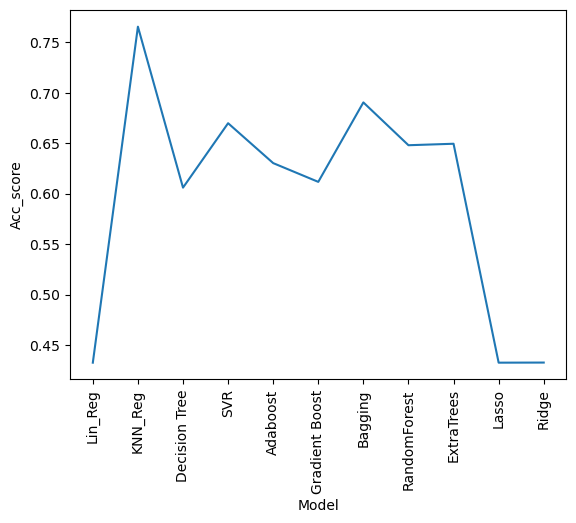

In [45]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Acc_score'],data=Acc_scores)
plt.xticks(rotation=90)

# Testing

In [46]:
test_data=pd.read_excel('cars_test.xlsx')
test_data.head()

symboling  normalized.losses         make fuel.type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          2              164.0         audi       gas        std   
2          2                NaN         audi       gas        std   
3          1                NaN         audi       gas        std   
4          1              158.0         audi       gas      turbo   

  num.of.doors   body.style drive.wheels engine.location  wheel.base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1         four        sedan          4wd             NaN        99.4  ...   
2          two        sedan          fwd           front        99.8  ...   
3         four        wagon          fwd           front       105.8  ...   
4         four        sedan          fwd           front       105.8  ...   

   engine.size  fuel.system  bore  stroke compression.ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          136         mpfi  3.19    3.40               8.0        115   
2          136         mpfi  3.19    3.40               8.5        110   
3          136         mpfi  3.19    3.40               8.5        110   
4          131         mpfi  3.13    3.40               8.3        140   

   peak.rpm city.mpg  highway.mpg  Car_Price  
0      5000       21           27        NaN  
1      5500       18           22        NaN  
2      5500       19           25        NaN  
3      5500       19           25        NaN  
4      5500       17           20        NaN  

[5 rows x 26 columns]

In [47]:
df_test=test_data.iloc[:,:-1]
df_test.head()


symboling  normalized.losses         make fuel.type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          2              164.0         audi       gas        std   
2          2                NaN         audi       gas        std   
3          1                NaN         audi       gas        std   
4          1              158.0         audi       gas      turbo   

  num.of.doors   body.style drive.wheels engine.location  wheel.base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1         four        sedan          4wd             NaN        99.4  ...   
2          two        sedan          fwd           front        99.8  ...   
3         four        wagon          fwd           front       105.8  ...   
4         four        sedan          fwd           front       105.8  ...   

   num.of.cylinders  engine.size  fuel.system  bore stroke compression.ratio  \
0              four          130         mpfi  3.47   2.68               9.0   
1              five          136         mpfi  3.19   3.40               8.0   
2              five          136         mpfi  3.19   3.40               8.5   
3              five          136         mpfi  3.19   3.40               8.5   
4              five          131         mpfi  3.13   3.40               8.3   

   horsepower peak.rpm  city.mpg  highway.mpg  
0         111     5000        21           27  
1         115     5500        18           22  
2         110     5500        19           25  
3         110     5500        19           25  
4         140     5500        17           20  

[5 rows x 25 columns]

In [48]:
df_test.shape

(52, 25)

In [49]:
df_test['symboling'].min()

-1

In [50]:
df_test.head()

symboling  normalized.losses         make fuel.type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          2              164.0         audi       gas        std   
2          2                NaN         audi       gas        std   
3          1                NaN         audi       gas        std   
4          1              158.0         audi       gas      turbo   

  num.of.doors   body.style drive.wheels engine.location  wheel.base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1         four        sedan          4wd             NaN        99.4  ...   
2          two        sedan          fwd           front        99.8  ...   
3         four        wagon          fwd           front       105.8  ...   
4         four        sedan          fwd           front       105.8  ...   

   num.of.cylinders  engine.size  fuel.system  bore stroke compression.ratio  \
0              four          130         mpfi  3.47   2.68               9.0   
1              five          136         mpfi  3.19   3.40               8.0   
2              five          136         mpfi  3.19   3.40               8.5   
3              five          136         mpfi  3.19   3.40               8.5   
4              five          131         mpfi  3.13   3.40               8.3   

   horsepower peak.rpm  city.mpg  highway.mpg  
0         111     5000        21           27  
1         115     5500        18           22  
2         110     5500        19           25  
3         110     5500        19           25  
4         140     5500        17           20  

[5 rows x 25 columns]

In [51]:
df_test.isna().sum()

symboling             0
normalized.losses    12
make                  0
fuel.type             0
aspiration            0
num.of.doors          5
body.style            0
drive.wheels          0
engine.location       4
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      1
engine.size           0
fuel.system           0
bore                  1
stroke                1
compression.ratio     0
horsepower            0
peak.rpm              0
city.mpg              0
highway.mpg           0
dtype: int64

In [53]:
df_test=df_test.fillna(method='bfill')

In [62]:
objcol_test=df_test.select_dtypes(include = 'object')

In [63]:
df_test.head()

symboling  normalized.losses  make  fuel.type  aspiration  num.of.doors  \
0          3              164.0     0          1           0             1   
1          2              164.0     1          1           0             0   
2          2              158.0     1          1           0             1   
3          1              158.0     1          1           0             0   
4          1              158.0     1          1           1             0   

   body.style  drive.wheels  engine.location  wheel.base  ...  \
0           0             2                0        88.6  ...   
1           3             0                0        99.4  ...   
2           3             1                0        99.8  ...   
3           4             1                0       105.8  ...   
4           3             1                0       105.8  ...   

   num.of.cylinders  engine.size  fuel.system  bore  stroke  \
0                 2          130            3  3.47    2.68   
1                 1          136            3  3.19    3.40   
2                 1          136            3  3.19    3.40   
3                 1          136            3  3.19    3.40   
4                 1          131            3  3.13    3.40   

   compression.ratio  horsepower  peak.rpm  city.mpg  highway.mpg  
0                9.0         111      5000        21           27  
1                8.0         115      5500        18           22  
2                8.5         110      5500        19           25  
3                8.5         110      5500        19           25  
4                8.3         140      5500        17           20  

[5 rows x 25 columns]

In [64]:
for i in objcol_test:
    df_test[i]=le.fit_transform(df_test[i])           

In [65]:
result = knn_reg.predict(df_test)
print('result:\n',result)

C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- body.style
- drive.wheels
- engine.location
- num.of.cylinders

  warnings.warn(message, FutureWarning)


ValueError: X has 25 features, but KNeighborsRegressor is expecting 21 features as input.

In [60]:
test_data['Car_Price']=result

NameError: name 'result' is not defined